##Name : Sahil Sudhir Utekar
##"TASK 1
#Prediction Using Supervised ML (Level - Beginner)
#Predict the percentage of marks of a student based on the number of study hours
#Loading the necessary libraries¶"




In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset

In [28]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


DataSet Loaded Sucessfully.

Data set size

In [29]:
df.shape





(25, 2)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
df.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 25
Columns  : 2

Features :
     : ['Hours', 'Scores']

Missing values    : 0

Unique values :  
 Hours     23
Scores    23
dtype: int64


Total Values in "Hours".

In [33]:
df['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

Total values in "Scores".

In [34]:
df['Scores'].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

##EDA
##Univariate Analysis
# Distribution plot for 'Hours'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


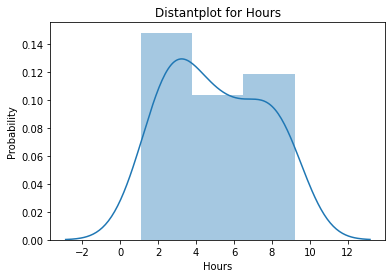

In [35]:
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distantplot for Hours')
plt.show()


##Distribution plot for 'Scores'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


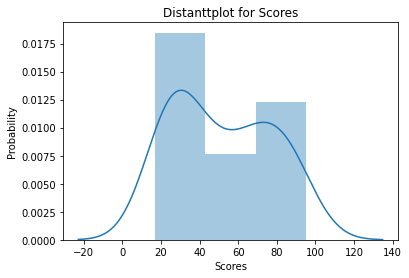

In [37]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distanttplot for Scores')
plt.show()



#Bivariate Analysis

##It Define empirical relationship between x and y

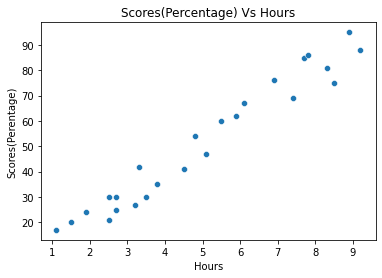

In [38]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(Perentage)')
plt.title('Scores(Percentage) Vs Hours')
plt.show()


#From above scatter plot, it is observed that scores are highly positively correlated with number of hours spent in studying. As the number of hours increases so shall the marks increase

##Multivariate Analysis

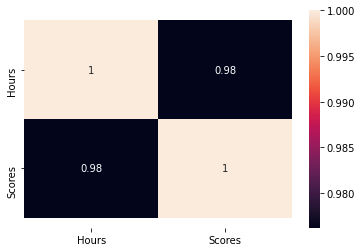

In [8]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.10,top-0.10)
plt.show()

##From the heatmap, it observed that the correlation is highly positive and the value of correlation between the hours of study and scores is 0.98

##Preparing the data for modeling

In [9]:
X=df[['Hours']]
y=df[['Scores']]


##Splitting the data in train and test

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=0)
Xtrain.shape , Xtest.shape


((20, 1), (5, 1))

##Using Linear Regression for building the model and prediction

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin=LinearRegression(fit_intercept=True)

##Fitting the model

In [41]:
lin.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Linear Regression intercept
lin.intercept_


array([2.01816004])

In [43]:
# Linear Regression Coefficient for hours
lin.coef_

array([[9.91065648]])

##Plotting the regression **line**

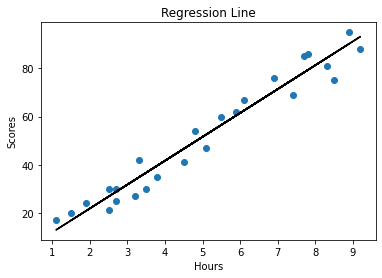

In [44]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

##Predicting for Ytest

In [45]:
ypred = lin.predict(Xtest)
print(ypred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


# flatten() 
##function is used to get a copy of an given array collapsed into one dimension.
##It is used for converting nD array into 1D array 

In [46]:
ypred=ypred.flatten()


In [48]:
dataset = pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':ypred})

In [49]:
print(dataset)


   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


# Testing for new data

In [58]:
hours =np.array(9.00).reshape(1,-1)
result= lin.predict(hours)
print('If you Study : ',np.asscalar(hours),"Hours")
print('Your  score will be  (%): ',np.asscalar(result),"\nHappy Learning")

If you Study :  9.0 Hours
Your  score will be  (%):  91.21406836721482 
Happy Learning


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
